<a href="https://colab.research.google.com/github/lacouth/metodos_numericos/blob/master/02_sistemas_lineares/SistemasLineares_introducao_apresentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (15,10) #configurando tamanho e fonte dos gráficos
plt.rcParams.update({'font.size': 22})

# Métodos Numéricos

## Introdução a interpolação polinomial

### Patric Lacouth

Frequentemente você terá de fazer estimativas de valores intermediários entre dados discretos. 

In [5]:
x = np.array([0.9,1,1.1,1.2,1.3,1.4,1.55,1.6,1.7,1.8,1.9,2.2,2.3,2.4,2.6,2.7,2.8])
y = np.array([0.14,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8])

pd.DataFrame({ 'Tensão' : x, 'Corrente' : y})

,Tensão,Corrente
0,0.90,0.14
1,1.00,0.20
2,1.10,0.30
3,1.20,0.40
4,1.30,0.50
5,1.40,0.70
6,1.55,0.80
7,1.60,0.90
8,1.70,1.00
9,1.80,1.10


O método mais comum usado para esse propósito é a interpolação polinomial.

$$P_{n-1}(x) = a_0 + a_1x+a_2x^2+a_3x^3 + ... + a_nx^n$$

Para $n$ pontos dados, existe um, e somente um, polinômio (n-1) que passa por todos os pontos.

<img src = "imagens/exemplo_polinomios.png" width = 70% style = "display:block; margin-left:auto;margin-right:auto;"/>

# Método direto

* simples
* erros de arrendodamento

## Exemplo 1:

Dado os pares (x,y), determine P(4):

x | y
---|---
3|40
5|82
9|214

para interpolação precisamos obter um polinômio com a seguinte forma:

$$P_2(x) = a_0 + a_1x + a_2x^2$$

utilizamos 3 pontos para criar o sistema.

$$P_2(3) = a_0 + 3a_1 + 9a_2 = 40$$
$$P_2(5) = a_0 + 5a_1 + 25a_2 = 82$$
$$P_2(9) = a_0 + 9a_1 + 81a_2 = 214$$

e montamos o sistema:

$$\begin{bmatrix}
1 & 3 & 9\\
1 & 5 & 25\\
1 & 9 & 81
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}
=
\begin{bmatrix}
40\\
82\\
214
\end{bmatrix}$$

Resolvendo o sistema através do método de Gauss com pivotação parcial obtemos um novo sistema:

$$\begin{bmatrix}
1 & 3 & 9\\
0 & 6 & 72\\
0 & 0 & -8
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}
=
\begin{bmatrix}
40\\
174\\
-16
\end{bmatrix}$$

Podemos então determinar os coeficientes:

$$a_2 = 2$$

$$a_1 = 5$$

$$a_0 = 7$$

O polinômio e o seu domínio:

$$P_2(x) = 7 + 5x + 2x^2$$

$$ D = \{ x \in \mathscr{R} | 3 \leq x \leq 9 \} $$

$$P_2(4) = 59 $$

In [2]:
def polinomio(x):
    return 7 + 5 * x + 2 * x **2

In [4]:
xi = np.array([3,5,9], dtype=float)
yi = np.array([40,82,214], dtype=float)

polinomio(xi)

array([ 40.,  82., 214.])

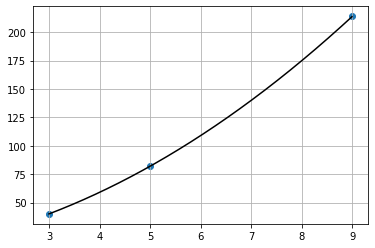

In [6]:
xa = np.arange(3,9,0.01)
ya = polinomio(xa)

plt.scatter(xi,yi)
plt.plot(xa,ya,'k')
plt.grid(True)

## Restrições

observe que a matriz de coeficientes tem sempre uma estrutura determinada:

$$\begin{bmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
1 & x_3 & x_3^2
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}
=
\begin{bmatrix}
f(x_1)\\
f(x_2)\\
f(x_3)
\end{bmatrix}$$

Matrizes de coeficientes dessa forma são chamadas de matrizes de [Vandermonde](https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde).

# now, go code!